# 02 - Análise Exploratória
Este notebook realiza EDA (exploração) a partir do dataset processado em `data/processed/dataset_processado.csv`.

In [3]:
import pandas as pd
path = 'dataset_ajustado.csv'
df = pd.read_csv(path)
df.shape

(253680, 19)

In [4]:
df.head()

,pressao_alta,colesterol_alto,imc,fumante,avc,ataque_cardiaco,atividade_fisica,frutas,vegetais,alto_consumo_alcool,convenio_medico,dificuldade_subir_escadas,sexo,idade,faixa_etaria,diabetes_flag,faixa_imc,risco_total,categoria_risco
0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,9.0,60-64,0,Obesidade III,6,Alto
1,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,50-54,0,Sobrepeso,2,Moderado
2,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9.0,60-64,0,Sobrepeso,5,Alto
3,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,11.0,70-74,0,Sobrepeso,3,Moderado
4,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,11.0,70-74,0,Peso normal,3,Moderado


## 1.0 Distribuições

In [5]:
print(df['categoria_risco'].value_counts())
print('\nIMC média:', df['imc'].mean())

categoria_risco
Moderado    109072
Alto         90884
Baixo        53724
Name: count, dtype: int64

IMC média: 28.382363607694735


## 1.1. diabetes x faixa etária

In [6]:
if 'diabetes_flag' in df.columns:
    print(pd.crosstab(df['faixa_etaria'], df['diabetes_flag'], normalize='index'))
else:
    print('diabetes_flag não disponível')

diabetes_flag         0         1
faixa_etaria                     
18-24          0.986316  0.013684
25-29          0.981574  0.018426
30-34          0.971770  0.028230
35-39          0.954713  0.045287
40-44          0.934951  0.065049
45-49          0.912105  0.087895
50-54          0.882648  0.117352
55-59          0.861735  0.138265
60-64          0.827548  0.172452
65-69          0.796297  0.203703
70-74          0.781541  0.218459
75-79          0.787046  0.212954
80+            0.815182  0.184818


## 1.2. Correlação entre o risco total de desenvolver diabetes e as demais variaveis

In [7]:
# Correlação (numérica)
num = df.select_dtypes(include=['int64','float64'])
num.corr()['risco_total'].sort_values(ascending=False).head(10)

,risco_total
risco_total,1.000000
pressao_alta,0.652578
colesterol_alto,0.577261
imc,0.544067
idade,0.459446
diabetes_flag,0.332380
dificuldade_subir_escadas,0.318482
ataque_cardiaco,0.228140
fumante,0.129798
avc,0.128774


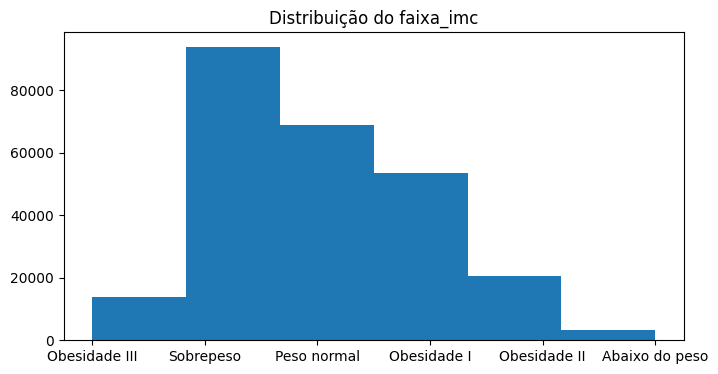

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.hist(df['faixa_imc'].dropna(), bins=6)
plt.title('Distribuição do faixa_imc')
plt.show()

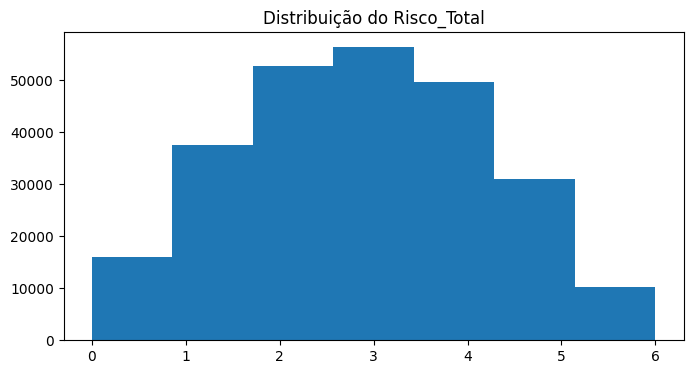

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.hist(df['risco_total'].dropna(), bins=7)
plt.title('Distribuição do Risco_Total')
plt.show()